# HW3

## Q2: K-means clustering (40 pts)
    1. Given a K-means clustering model, run it on the iris dataset 20 times. Report the average NMI value along with its std (Normalized Mutual Information (NMI) is a standard clustering evaluation method. Basically, a higher NMI value indicates better clustering performance. More details could be referred to usage [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.normalized_mutual_info_score.html) and this [introduction](https://nlp.stanford.edu/IR-book/html/htmledition/evaluation-of-clustering-1.html)). Save the best clustering result by NMI for the following steps. (10 pts)
    2. Repeat step 1 for the given spectral clustering and hierarchical clustering models. Compare the clustering performance of these three methods by averaged NMI$\pm$std. (10 pts) 
    3. Plot the best and worst clustering results of K-means by NMI. (20 pts)

We will directly use the Sklearn libary for running K-means, spectral clustering, and hierarchical clustering. More details about the function usage could be referred to [Sklearn cluster](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) and this [tutorial](https://scikit-learn.org/stable/modules/clustering.html).

In [2]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.metrics.cluster import normalized_mutual_info_score as nmi_score
import statistics
dataset = load_iris()
X = dataset.data
gnd = dataset.target
semantic_labels = dataset.target_names
print(X)
print(semantic_labels)
print(gnd)
K = len(set(gnd)) # get the ground-truth cluster number

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

### Q1-1: K-means (20 pts)
Given a K-means model, run it 20 times to report average NMI and std value. Save the clustering labels of each trial for the following steps.

In [3]:
km = KMeans(n_clusters=K, init='random', n_init=1)
idx, nmis = [], []
for i in range(20):
    # run K-means here
    # idx.append(the obtained clustering labels)
    # nmi.append(nmi_score(gnd, clustering label))
    km_predictions = km.fit_predict(X)
    idx.append(km.labels_)
    nmis.append(nmi_score(gnd,km.labels_))
    #pass # delete this statement once you complete this snippet.
# report mean and std values of nmis
print('nmis mean: {}\nnmis std: {}'.format(statistics.mean(nmis),statistics.stdev(nmis)))

nmis mean: 0.6714138935336338
nmis std: 0.08580960088377348


### Q1-2: Compare K-means with SC and AC (20 pts)
Repeat Q1-1 with the following two given models.

In [4]:
sc = SpectralClustering(n_clusters=K, n_init=1) # spectral clustering model
ac = AgglomerativeClustering(n_clusters=K) # hierarchical clustering model
km = KMeans(n_clusters=K, init='random', n_init=1)

idx, nmis = [], []
for i in range(20):
    km_predictions = km.fit_predict(X)
    idx.append(km.labels_)
    nmis.append(nmi_score(gnd,km.labels_))
print('Using KMeans')
print('nmis mean: {}\nnmis std: {}\n\n'.format(statistics.mean(nmis),statistics.stdev(nmis)))

idx, nmis = [], []
for i in range(20):
    sc_predictions = sc.fit_predict(X)
    idx.append(sc.labels_)
    nmis.append(nmi_score(gnd,sc.labels_))
print('Using Spectral Clustering:')
print('nmis mean: {}\nnmis std: {}\n\n'.format(statistics.mean(nmis),statistics.stdev(nmis)))

idx, nmis = [], []
for i in range(20):
    ac_predictions = ac.fit_predict(X)
    idx.append(ac.labels_)
    nmis.append(nmi_score(gnd,ac.labels_))
print('Using Agglomerative Clustering')
print('nmis mean: {}\nnmis std: {}\n\n'.format(statistics.mean(nmis),statistics.stdev(nmis)))

# TODO: repeat Q1-1 and compare km with sc and ac
# print the comparion results

Using KMeans
nmis mean: 0.7168832084752687
nmis std: 0.0663737267283476


Using Spectral Clustering:
nmis mean: 0.7979885217013319
nmis std: 0.0


Using Agglomerative Clustering
nmis mean: 0.770083661648787
nmis std: 0.0




### Q1-3: Plot K-means clustering results (20 pts)

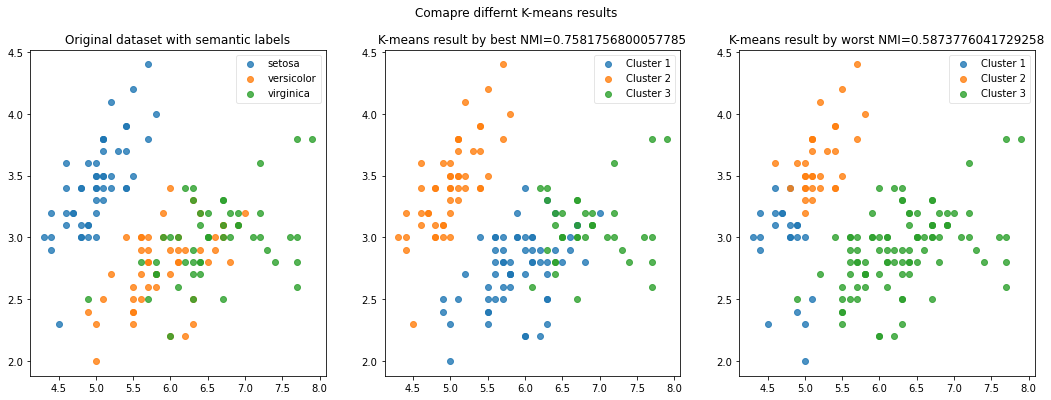

In [5]:
#import seaborn as sns
#sns.set_theme()
import matplotlib.pyplot as plt 

clustering_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3']

km = KMeans(n_clusters=K, init='random', n_init=1)
idx, nmis = [], []
for i in range(200):
    km_predictions = km.fit_predict(X)
    idx.append(km.labels_)
    nmis.append(nmi_score(gnd,km.labels_))

# TODO: 
# 1) find the best/worst clustering labels by NMI, termed as bst_idx and wst_idx
# 2) scatter plot the data samples upon the clustering labels, bst_idx and wst_idx.

#finding the best nmi
max_nmi = max(nmis)
max_index = nmis.index(max_nmi)
bst_idx = idx[max_index]

#finding the worst nmi
min_nmi = min(nmis)
min_index = nmis.index(min_nmi)
wst_idx = idx[min_index]


fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18,6))
fig.suptitle('Comapre differnt K-means results')
colors = ['tab:blue', 'tab:orange', 'tab:green']
ax1.set_title('Original dataset with semantic labels')
# fill out the NMI values in the title
ax2.set_title('K-means result by best NMI={}'.format(max_nmi))
ax3.set_title('K-means result by worst NMI={}'.format(min_nmi))

for color, i in zip(colors, [0, 1, 2]):
    ax1.scatter(X[gnd == i, 0], X[gnd == i, 1], color=color, alpha=.8, label=semantic_labels[i])
    ax2.scatter(X[bst_idx == i, 0], X[bst_idx == i, 1], color=color, alpha=.8, label=clustering_labels[i])
    ax3.scatter(X[wst_idx == i, 0], X[wst_idx == i, 1], color=color, alpha=.8, label=clustering_labels[i])

    # ax2.scatter(?) plot with bst_idx and clsutering_labels
    # ax3.scatter(?) plot with wst_idx and clsutering_labels
ax1.legend(fancybox=True, framealpha=0.5)

# TODO: add legends for ax2 and ax3
ax2.legend(fancybox=True, framealpha=0.5)
ax3.legend(fancybox=True, framealpha=0.5)

Answer the following questions:
- Can we use the semantic_labels for the clustering results plot? Why? 
- Why does the same clustering label (e.g., clustering 1) have different groups of samples between two K-means results?

Please directly answer the above question with Markdown inside this notebook file.

In [6]:
"""1.) We cannot use semantic labels for clutering, In the algorithm, we start with random clusters and hence these
       do not have any semantic meaning whatsover. As shown in the graph, we can arrive at the same clusters as gnd however
       there is no way of giving the clusters the matching semantic label before we run the algorithm
   2.) There can be multiple valid clusters under the k means algorith because it converges on the local minima which is sometimes not th
       the same as the global minima thus you can have different troups of samples between two K-means results."""

'1.) We cannot use semantic labels for clutering, In the algorithm, we start with random clusters and hence these\n       do not have any semantic meaning whatsover. As shown in the graph, we can arrive at the same clusters as gnd however\n       there is no way of giving the clusters the matching semantic label before we run the algorithm\n   2.) There can be multiple valid clusters under the k means algorith because it converges on the local minima which is sometimes not th\n       the same as the global minima thus you can have different troups of samples between two K-means results.'